In [1]:
import torch
import sys

from helpers import *
from lrp_helpers import *
from lrp_database import *
from select_images_helpers import *

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl

from pathlib import Path

# from yolo
from models.experimental import attempt_load

_ = torch.hub.load('ultralytics/yolov5', "yolov5s", pretrained=True)

Using cache found in /home/akanksha/.cache/torch/hub/ultralytics_yolov5_master


requirements: Ultralytics requirement ['setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)


YOLOv5 🚀 2023-11-14 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA A100 80GB PCIe, 81038MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


requirements: Ultralytics requirement ['setuptools>=65.5.1'] not found, attempting AutoUpdate...


Using cache found in /home/akanksha/.cache/torch/hub/ultralytics_yolov5_master


requirements: ❌ AutoUpdate skipped (offline)


YOLOv5 🚀 2023-11-14 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA A100 80GB PCIe, 81038MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /home/akanksha/.cache/torch/hub/ultralytics_yolov5_master


requirements: Ultralytics requirement ['setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)


YOLOv5 🚀 2023-11-14 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA A100 80GB PCIe, 81038MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [12]:
#model_file = Path('../datasets/models/2021-10-follicle-detection-2-classes.zip')
model_file = Path('3016bf3db53073454d0a9c0ea40321.zip') #
device = torch.device('cpu')

weights = model_file
model = attempt_load(weights, device=device)

model_exp = attempt_load(weights, device=device)

model.eval();
model_exp.eval();


Fusing layers... 
Model summary: 224 layers, 7056607 parameters, 0 gradients
Fusing layers... 
Model summary: 224 layers, 7056607 parameters, 0 gradients


In [13]:
# parameters
detect_thresh = 0.4
nms_thresh = 0.2
n_max = -1
if n_max<0:
    n_max = sys.maxsize

grad_of = "logit_class"
gamma = 0.05
input_lv, input_hv = (0, 1)

class_names = ['Growing_Follicle', 'Primordial_Follicle']

use_gpu_if_available = False

m_model = meta_model(model, 
                    detect_thresh = detect_thresh,
                    nms_thresh = nms_thresh,
                    )

m_model_exp = meta_model(model_exp,
                        detect_thresh = detect_thresh,
                        nms_thresh = nms_thresh,
                        )

#m_model.prepare_exp()

## True Positive

In [14]:
# image_path = r'/home/akanksha/interpretability-of-ML-models/lrp_4_yolov5/training_data_2_class/images/validation'
# label_path = r'/home/akanksha/interpretability-of-ML-models/lrp_4_yolov5/training_data_2_class/labels/validation'

# ds = CustomImageDataset(image_path, label_path)

## False Positive

In [15]:
# image_path = r'/home/akanksha/interpretability-of-ML-models/lrp_4_yolov5/training_data_2_class/FP/images/validation'
# label_path = r'/home/akanksha/interpretability-of-ML-models/lrp_4_yolov5/training_data_2_class/FP/labels/validation'

# ds = CustomImageDataset(image_path, label_path)

## False Negative

In [16]:
image_path = r'/home/akanksha/interpretability-of-ML-models/lrp_4_yolov5/training/images/validation'
label_path = r'/home/akanksha/interpretability-of-ML-models/lrp_4_yolov5/training/labels/validation'

ds = CustomImageDataset(image_path, label_path)

In [17]:
blocks = []
for i in range(0,3):
    instance = ds.__getitem__(i)
    print(instance)
    print(len(instance['label']))
    blocks.append(create_result_table_image(m_model, instance))

result_table = pd.concat([pd.DataFrame(df) for df in blocks])
# result_table

{'image': <PIL.Image.Image image mode=RGB size=1280x1280 at 0x731A66003700>, 'label': [[1.0, 0.699609, 0.723437, 0.0382813, 0.065625]], 'file_name': '04R024-301-1_10 O2_x005_y004_f0.png'}
1
{'image': <PIL.Image.Image image mode=RGB size=1280x1280 at 0x73198216BE20>, 'label': [[1.0, 0.195703, 0.766016, 0.0507812, 0.0570312]], 'file_name': '04R024-301-1_02_O1_x005_y009_f0.png'}
1
{'image': <PIL.Image.Image image mode=RGB size=1280x1280 at 0x731A6606C640>, 'label': [[0.0, 0.0847656, 0.100391, 0.155469, 0.152344]], 'file_name': '04R024-383-1_10 - O2_x008_y006_f0.png'}
1


In [18]:
result_table

,img_name,object_id,real_class,object_class,confidence,center_true,bb,real_bb,center_pred
0,04R024-301-1_10 O2_x005_y004_f0.png,object_0,1.0,NaN,NaN,"(0.699609, 0.723437)",not impl.,NaN,NaN
1,04R024-301-1_10 O2_x005_y004_f0.png,object_1,NaN,1.0,0.656,NaN,NaN,not impl.,NaN
0,04R024-301-1_02_O1_x005_y009_f0.png,object_0,1.0,1.0,0.853,"(0.195703, 0.766016)",not impl.,not impl.,"(0.1964, 0.76639)"
0,04R024-383-1_10 - O2_x008_y006_f0.png,object_0,0.0,0.0,0.832,"(0.0847656, 0.100391)",not impl.,not impl.,"(0.09239, 0.0977)"


In [19]:
# explain top x of c_matrix
def explain_from_cmatrix(result_table, cm_type, x=False):
    cm, df_x = extract_metrics(result_table, cm_type)
    print("cm",cm)
    if cm_type:
        if x:
            df_x.sort_values(by='confidence',inplace=True)
            return df_x['img_name'].unique().tolist()[:x]
        else:
            df_x.sort_values(by='confidence',inplace=True)
            return df_x['img_name'].unique().tolist()

explain_from_cmatrix(result_table,'t0p0')

cm     p_1  p_0  bn
t1    1    0   1
t0    0    1   0


['04R024-383-1_10 - O2_x008_y006_f0.png']

In [20]:
# explain top x of c_matrix
def explain_from_cmatrix(result_table, cm_type, x=False):
    cm, df_x = extract_metrics(result_table, cm_type)
    print("cm",cm)
    if cm_type:
        if x:
            df_x.sort_values(by='confidence',inplace=True)
            return df_x['img_name'].unique().tolist()[:x]
        else:
            df_x.sort_values(by='confidence',inplace=True)
            return df_x['img_name'].unique().tolist()

imgs = explain_from_cmatrix(result_table,'t0p1')+explain_from_cmatrix(result_table,'t1p0')+explain_from_cmatrix(result_table,'t0p0')+explain_from_cmatrix(result_table,'t1p1')+explain_from_cmatrix(result_table,'t1bn')+explain_from_cmatrix(result_table,'t0bn')
imgs = set(imgs)
imgs

cm     p_1  p_0  bn
t1    1    0   1
t0    0    1   0
cm     p_1  p_0  bn
t1    1    0   1
t0    0    1   0
cm     p_1  p_0  bn
t1    1    0   1
t0    0    1   0
cm     p_1  p_0  bn
t1    1    0   1
t0    0    1   0
cm     p_1  p_0  bn
t1    1    0   1
t0    0    1   0
cm     p_1  p_0  bn
t1    1    0   1
t0    0    1   0


{'04R024-301-1_02_O1_x005_y009_f0.png',
 '04R024-301-1_10 O2_x005_y004_f0.png',
 '04R024-383-1_10 - O2_x008_y006_f0.png'}

<class 'models.common.Conv'>: 59
<class 'torch.nn.modules.conv.Conv2d'>: 3
<class 'models.common.Bottleneck'>: 12
We have 12 Bottlenecks
and 7 of them with add=True
cm     p_1  p_0  bn
t1    1    0   1
t0    0    1   0
img_id 1
img 04R024-301-1_02_O1_x005_y009_f0.png
class_names ['Growing_Follicle', 'Primordial_Follicle']
model preds tensor([[2.05515e+02, 9.33618e+02, 2.97265e+02, 1.02834e+03, 8.52926e-01, 1.00000e+00]])
n_p 1
labels: [[1.0, 0.195703, 0.766016, 0.0507812, 0.0570312]]
n_l 1
object_index 1


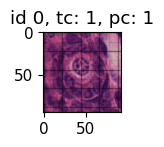

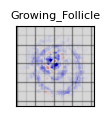

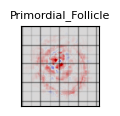

,pred_cls,org_cls,outcome,binary_img,heatmap_0,conf,obj,heatmap_1,classes
0,1,1,TP,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0.98408,0.86672,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,"{0,1}"


In [21]:
import warnings
warnings.filterwarnings("ignore")

focus_conv, arr_yolo_convs, arr_inside_yolo_convs, arr_detection_convs, arr_summation_shortcuts = prepare_for_lrp(m_model)
#m_model.prepare_exp()

#m_model_exp.prepare_exp() # not reversible yet
for img_id, img in enumerate(explain_from_cmatrix(result_table,'t1p1')):
    instance = ds.__getitem__(ds.__getid__(img))
    image_raw = instance['image']
    model_prediction = m_model.predict(instance)
    # model preparation
    
    print("img_id",ds.__getid__(img))
    print("img",img)
    print("class_names", class_names)
    exp = explainer(model= m_model,
                    instance= instance,
                    detect_thresh= detect_thresh,
                    nms_thresh= nms_thresh,
                    grad_of=grad_of,
                    gamma=gamma,
                    n_max= n_max,
                    input_lv= input_lv,
                    input_hv= input_hv,
                    focus_conv= focus_conv,
                    arr_yolo_convs= arr_yolo_convs,
                    arr_inside_yolo_convs= arr_inside_yolo_convs,
                    arr_detection_convs= arr_detection_convs,
                    arr_summation_shortcuts= arr_summation_shortcuts
                    )

    df = exp.get_heatmaps_for_instance(exp, instance=instance, img=image_raw, class_names=class_names)

<class 'models.common.Conv'>: 167
<class 'torch.nn.modules.conv.Conv2d'>: 1
<class 'models.common.Bottleneck'>: 60
We have 60 Bottlenecks
and 32 of them with add=True
cm     p_1  p_0  bn
t1    0    0   2
t0    0    1   0
img_id 1
img 04R024-383-1_10 - O2_x008_y006_f0.png
class_names ['Growing_Follicle', 'Primordial_Follicle']
model preds tensor([[ 12.58234,  24.00358, 226.13513, 231.79388,   0.87685,   0.00000]])
n_p 1
labels: [[0.0, 0.0847656, 0.100391, 0.155469, 0.152344]]
n_l 1
object_index 1


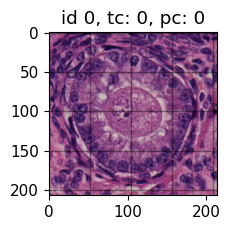

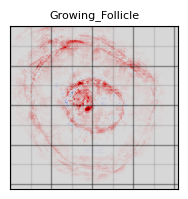

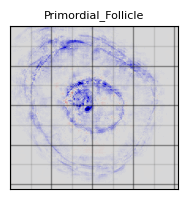

,pred_cls,org_cls,outcome,binary_img,conf,obj,heatmap_0,heatmap_1,classes
0,0,0,TP,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0.97692,0.89757,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,"{0,1}"


In [13]:
import warnings
warnings.filterwarnings("ignore")

focus_conv, arr_yolo_convs, arr_inside_yolo_convs, arr_detection_convs, arr_summation_shortcuts = prepare_for_lrp(m_model)
#m_model.prepare_exp()

#m_model_exp.prepare_exp() # not reversible yet
for img_id, img in enumerate(explain_from_cmatrix(result_table,'t0p0')):
    instance = ds.__getitem__(ds.__getid__(img))
    image_raw = instance['image']
    model_prediction = m_model.predict(instance)
    # model preparation
    
    print("img_id",ds.__getid__(img))
    print("img",img)
    print("class_names", class_names)
    exp = explainer(model= m_model,
                    instance= instance,
                    detect_thresh= detect_thresh,
                    nms_thresh= nms_thresh,
                    grad_of=grad_of,
                    gamma=gamma,
                    n_max= n_max,
                    input_lv= input_lv,
                    input_hv= input_hv,
                    focus_conv= focus_conv,
                    arr_yolo_convs= arr_yolo_convs,
                    arr_inside_yolo_convs= arr_inside_yolo_convs,
                    arr_detection_convs= arr_detection_convs,
                    arr_summation_shortcuts= arr_summation_shortcuts
                    )

    df = exp.get_heatmaps_for_instance(exp, instance=instance, img=image_raw, class_names=class_names)

#### Insert Heatmap

In [11]:
model_file_path = '/'.join(os.path.abspath(model_file).split('/')[3:])
print(model_file_path)
# insert model into database
process_model_to_database(platform_url=None, local_model_path=model_file_path)

interpretability-of-ML-models/lrp_4_yolov5/random_split_2_classes.zip
Model file exist.


In [12]:
# #insert lrp explanations into table
xai_approach_metric = 'lrp'
Xai_Status = 'okay'
model_id_internal = insert_explanations(xai_approach_metric, Xai_Status, model_file_path)

Explanation exist for this model.


In [13]:
focus_conv, arr_yolo_convs, arr_inside_yolo_convs, arr_detection_convs, arr_summation_shortcuts = prepare_for_lrp(m_model)
#m_model.prepare_exp()
#m_model_exp.prepare_exp() # not reversible yet
for img_id, img in enumerate(imgs):
    instance = ds.__getitem__(ds.__getid__(img))
    image_raw = instance['image']
    model_prediction = m_model.predict(instance)
    # model preparation
    
    print("img_id",ds.__getid__(img))
    print("img",img)
    exp = explainer(model= m_model,
                    instance= instance,
                    detect_thresh= detect_thresh,
                    nms_thresh= nms_thresh,
                    grad_of=grad_of,
                    gamma=gamma,
                    n_max= n_max,
                    input_lv= input_lv,
                    input_hv= input_hv,
                    focus_conv= focus_conv,
                    arr_yolo_convs= arr_yolo_convs,
                    arr_inside_yolo_convs= arr_inside_yolo_convs,
                    arr_detection_convs= arr_detection_convs,
                    arr_summation_shortcuts= arr_summation_shortcuts
                    )

    df = exp.get_heatmaps_for_instance(exp, instance=instance, img=image_raw, class_names=class_names)
    #insert heatmap into the database
    if df.empty:
        print("No image file for this class")
    else:
        for index, row in df.iterrows():
            binary_img = row['binary_img']
            original_class = row['org_cls']
            predicted_class = row['pred_cls']
            confidence = row['conf']
            objectiveness = row['obj']
            outcome = row['outcome']
            binary_heatmap_c0 = row['heatmap_0']
            binary_heatmap_c1 = row['heatmap_1']
            classes = row['classes']
            
            insert_lrp_2_classes(model_id_internal, binary_img, original_class, predicted_class, confidence, objectiveness, binary_heatmap_c0, binary_heatmap_c1, classes, img, outcome)

<class 'models.common.Conv'>: 167
<class 'torch.nn.modules.conv.Conv2d'>: 1
<class 'models.common.Bottleneck'>: 60
We have 60 Bottlenecks
and 32 of them with add=True
img_id 7
img 04R024-304-1_11_O2_x003_y004_f0.png
model preds tensor([[714.68353,  47.12181, 783.56805, 114.63969,   0.84590,   1.00000]])
n_p 1
labels: [[1.0, 0.585547, 0.0617188, 0.0445313, 0.05]]
n_l 1
object_index 1


,pred_cls,org_cls,outcome,binary_img,heatmap_0,conf,obj,heatmap_1,classes
0,1,1,TP,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0.99802,0.84758,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,"{0,1}"


Data inserted into database successfully.
img_id 4
img 04R024-304-1_07_O1_x004_y006_f0.png
model preds tensor([[1.15045e+03, 9.85895e+02, 1.27986e+03, 1.13852e+03, 7.43205e-01, 0.00000e+00]])
n_p 1
labels: [[1.0, 0.948438, 0.826172, 0.101562, 0.110156]]
n_l 1
object_index 1


,pred_cls,org_cls,outcome,binary_img,conf,obj,heatmap_0,heatmap_1,classes
0,0,1,Missclassified,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0.86799,0.85623,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,"{0,1}"


Data inserted into database successfully.
img_id 6
img 04R024-304-1_08_O1_x004_y008_f0.png
model preds tensor([[327.00986, 339.91409, 402.04276, 416.25552,   0.86969,   1.00000]])
n_p 1
labels: [[1.0, 0.285156, 0.290625, 0.05625, 0.05625]]
n_l 1
object_index 1


,pred_cls,org_cls,outcome,binary_img,heatmap_0,conf,obj,heatmap_1,classes
0,1,1,TP,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0.99728,0.87207,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,"{0,1}"


Data inserted into database successfully.
img_id 3
img 04R024-304-1_05_O1_x005_y001_f0.png
model preds tensor([[4.84513e+02, 6.18027e+02, 5.49854e+02, 6.82216e+02, 4.83886e-01, 1.00000e+00]])
n_p 1
labels: [[1.0, 0.403125, 0.505859, 0.0359375, 0.0523438]]
n_l 1
object_index 1


,pred_cls,org_cls,outcome,binary_img,heatmap_0,conf,obj,heatmap_1,classes
0,1,1,TP,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0.99655,0.48556,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,"{0,1}"


Data inserted into database successfully.
img_id 2
img 04R024-304-1_05_O1_x002_y002_f0.png
model preds tensor([[1.06054e+03, 6.02328e+02, 1.22866e+03, 7.64478e+02, 9.05495e-01, 1.00000e+00]])
n_p 1
labels: [[1.0, 0.89375, 0.536328, 0.1, 0.100781]]
n_l 1
object_index 1


,pred_cls,org_cls,outcome,binary_img,heatmap_0,conf,obj,heatmap_1,classes
0,1,1,TP,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0.97503,0.92869,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,"{0,1}"


Data inserted into database successfully.
img_id 1
img 04R024-304-1_02_O2_x004_y002_f0.png
model preds tensor([[9.84567e+02, 1.39559e+02, 1.28395e+03, 5.25988e+02, 7.91603e-01, 0.00000e+00]])
n_p 1
labels: [[0.0, 0.890625, 0.251953, 0.217188, 0.272656]]
n_l 1
object_index 1


,pred_cls,org_cls,outcome,binary_img,conf,obj,heatmap_0,heatmap_1,classes
0,0,0,TP,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0.99713,0.79388,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,"{0,1}"


Data inserted into database successfully.
img_id 0
img 04R024-304-1_02_O1_x002_y002_f0.png
model preds tensor([[1.12490e+03, 1.06742e+03, 1.20544e+03, 1.14572e+03, 8.96045e-01, 1.00000e+00],
        [9.56993e+02, 3.45889e+02, 1.28779e+03, 7.05918e+02, 2.99631e-01, 0.00000e+00]])
n_p 2
labels: [[1.0, 0.910547, 0.863281, 0.0523438, 0.059375]]
n_l 1
object_index 1
object_index 2


,pred_cls,org_cls,outcome,binary_img,heatmap_0,conf,obj,heatmap_1,classes
0,1,1,TP,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0.99783,0.89799,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,"{0,1}"
1,0,BG,FP,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0.99911,0.2999,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,"{0,1}"


Data inserted into database successfully.
Data inserted into database successfully.
img_id 5
img 04R024-304-1_07_O1_x006_y004_f0.png
model preds tensor([[1.12820e+03, 2.86884e+02, 1.19762e+03, 3.61232e+02, 8.24291e-01, 1.00000e+00],
        [1.76540e+00, 6.01692e+02, 1.52061e+02, 9.15985e+02, 7.45423e-01, 0.00000e+00]])
n_p 2
labels: [[0.0, 0.0574219, 0.596875, 0.114844, 0.229687]]
n_l 1
object_index 1
object_index 2


,pred_cls,org_cls,outcome,binary_img,heatmap_0,conf,obj,heatmap_1,classes
0,1,0,Missclassified,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0.99784,0.82608,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,"{0,1}"
1,0,BG,FP,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0.99507,0.74912,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,"{0,1}"


Data inserted into database successfully.
Data inserted into database successfully.
